# DS-SF-30 | Codealong 04: Exploratory Data Analysis | Answer Key

In [1]:
import os

import math

import numpy as np
import pandas as pd
pd.set_option('display.max_rows', 20)
pd.set_option('display.notebook_repr_html', True)
pd.set_option('display.max_columns', 10)

import matplotlib.pyplot as plt
%matplotlib inline
plt.style.use('ggplot')

## Part A - Activity | The _pandas_ Library

In [2]:
df = pd.DataFrame({'name': ['Alice', 'Bob', 'Carol', 'Dave', 'Eve', 'Frank'],
    'gender': ['Female', 'Male', 'Female', 'Male', 'Female', 'Male'],
    'age': [24, 34, 44, 41, 52, 43],
    'marital_status': [0, 2, 1, 2, 0, 1]}).\
        set_index('name')

In [3]:
df

,age,gender,marital_status
name,,,
Alice,24,Female,0
Bob,34,Male,2
Carol,44,Female,1
Dave,41,Male,2
Eve,52,Female,0
Frank,43,Male,1


> ### Question 1.  Subset the dataframe on the age and gender columns

In [4]:
df[ ['age', 'gender'] ] # by column names; DataFrame

,age,gender
name,,
Alice,24,Female
Bob,34,Male
Carol,44,Female
Dave,41,Male
Eve,52,Female
Frank,43,Male


(or)

In [5]:
df[ [0, 1] ] # by location; DataFrame

,age,gender
name,,
Alice,24,Female
Bob,34,Male
Carol,44,Female
Dave,41,Male
Eve,52,Female
Frank,43,Male


> ### Question 2.  Subset the dataframe on the age column alone, first as a `DataFrame`, then as a `Series`

In [6]:
df[ [ 'age' ] ] # by column name; DataFrame

,age
name,
Alice,24
Bob,34
Carol,44
Dave,41
Eve,52
Frank,43


(or)

In [7]:
df[ [0] ] # by location; DataFrame

,age
name,
Alice,24
Bob,34
Carol,44
Dave,41
Eve,52
Frank,43


In [8]:
df['age'] # by column name; Series

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

(or)

In [9]:
df.age # by column name (property); Series

name
Alice    24
Bob      34
Carol    44
Dave     41
Eve      52
Frank    43
Name: age, dtype: int64

> ### Question 3.  Subset the dataframe on the rows Bob and Carol

In [10]:
df.loc[ ['Bob', 'Carol'] ] # by index labels; DataFrame

,age,gender,marital_status
name,,,
Bob,34,Male,2
Carol,44,Female,1


(or)

In [11]:
df.iloc[ [1, 2] ] # by location; DataFrame

,age,gender,marital_status
name,,,
Bob,34,Male,2
Carol,44,Female,1


> ### Question 4.  Subset the dataframe on the row Eve alone, first as a `DataFrame`, then as a `Series`

In [12]:
df.loc[ ['Eve'] ] # by index label; DataFrame

,age,gender,marital_status
name,,,
Eve,52,Female,0


(or)

In [13]:
df.iloc[ [4] ] # by location; DataFrame

,age,gender,marital_status
name,,,
Eve,52,Female,0


In [14]:
df.loc['Eve'] # by index label; Series

age                   52
gender            Female
marital_status         0
Name: Eve, dtype: object

(or)

In [15]:
df.iloc[4] # by location; Series

age                   52
gender            Female
marital_status         0
Name: Eve, dtype: object

> ### Question 5.  How old is Frank?

In [16]:
df.at['Frank', 'age'] # by index label, column name

43

(or)

In [17]:
df.iat[5, 0] # by location

43

(or)

In [18]:
df.loc['Frank']['age'] # subset by row then by column

43

(or)

In [19]:
df.loc['Frank'].age

43

(or)

In [20]:
df['age']['Frank'] # subset by column then by row

43

(or)

In [21]:
df.age.Frank

43

> ### Question 6.  What is the men’s mean age, the women’s median age?

In [22]:
print "Men's mean age =", df[df.gender == 'Male'].age.mean()
print "Women's median age =", df[df.gender == 'Female'].age.median()

Men's mean age = 39.3333333333
Women's median age = 44.0


(or)

In [23]:
print "Men's mean age =", df.groupby('gender').age.mean().Male
print "Women's median age =", df.groupby('gender').age.median().Female

Men's mean age = 39.3333333333
Women's median age = 44


## Part B

- `.mean()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mean.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mean.html)
- `.var()`, `.std()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.var.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.std.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.std.html)

In [24]:
df = pd.read_csv(os.path.join('..', 'datasets', 'dataset-04-zillow.csv'), index_col = 'ID')

In [25]:
df

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15063471,"55 Vandewater St APT 9, San Francisco, CA",12/4/15,0.7100,0.0,1.0,NaN,550.0,NaN,1980.0
15063505,"740 Francisco St, San Francisco, CA",11/30/15,2.1500,0.0,NaN,2.0,1430.0,2435.0,1948.0
15063609,"819 Francisco St, San Francisco, CA",11/12/15,5.6000,0.0,2.0,3.5,2040.0,3920.0,1976.0
15064044,"199 Chestnut St APT 5, San Francisco, CA",12/11/15,1.5000,0.0,1.0,1.0,1060.0,NaN,1930.0
15064257,"111 Chestnut St APT 403, San Francisco, CA",1/15/16,0.9700,0.0,2.0,2.0,1299.0,NaN,1993.0
15064295,"111 Chestnut St APT 702, San Francisco, CA",12/17/15,0.9400,0.0,2.0,2.0,1033.0,NaN,1993.0
15064391,"1821 Grant Ave APT 101, San Francisco, CA",12/15/15,0.8350,0.0,1.0,1.0,1048.0,NaN,1975.0
15064536,"2300 Leavenworth St, San Francisco, CA",12/4/15,2.8300,0.0,3.0,2.0,2115.0,1271.0,1913.0
15064640,"1047-1049 Lombard St, San Francisco, CA",1/14/16,4.0500,1.0,NaN,NaN,4102.0,3049.0,1948.0


### `Series.mean()` - Compute the `Series` mean value

In [26]:
df.SalePrice.mean()

1.3974229429999998

> #### Activity: What's `Size`'s mean?

In [27]:
df.Size.mean()

1641.3009307135471

`Size` has `NaN` values that `.mean()` skips.

> #### Activity: What fraction of the properties sold in the dataset are studios?

In [28]:
print df.IsAStudio.mean()
print df.IsAStudio.sum() / df.shape[0]

0.0294117647059
0.029


About 3% of the properties sold are studios.  (Note that we are "dropping" the properties with no studio information)

### `DataFrame.mean()` - Compute the `DataFrame` mean value

In [29]:
df.mean()

SalePrice         1.397423
IsAStudio         0.029412
Beds              2.572967
Baths             1.977548
Size           1641.300931
LotSize        2829.463768
BuiltInYear    1947.533333
dtype: float64

`DataFrame.mean()` only applies to numerical columns.  Address and date of sales aren't included.

### `.var()` - Compute the unbiased variance (normalized by `N-1` by default)

In [30]:
df.var()

SalePrice      3.015131e+00
IsAStudio      2.857569e-02
Beds           1.564729e+00
Baths          1.277654e+00
Size           1.054762e+06
LotSize        1.154665e+06
BuiltInYear    1.445639e+03
dtype: float64

> #### Activity: What's the variance for the number of beds in the dataset?

In [31]:
df.Beds.var()

1.5647293928888621

### `.std()` - Compute the unbiased standard deviation (normalized by `N-1` by default)

In [32]:
df.std()

SalePrice         1.736413
IsAStudio         0.169043
Beds              1.250891
Baths             1.130334
Size           1027.016175
LotSize        1074.553604
BuiltInYear      38.021563
dtype: float64

> #### Activity: What's the standard deviation for the number of beds in the dataset?

In [33]:
print df.Beds.std()

# Let's double check the variance
print df.Beds.std() ** 2

1.25089143929
1.56472939289


## Part C

- `.median()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.median.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.median.html)
- `.count()`, `.sum()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.count.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sum.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.sum.html)
- `.count()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.dropna.html)
- `.min()`, `.max()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.min.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.max.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.max.html)
- `.quantile()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.quantile.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.quantile.html)
- `.describe()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.describe.html)

### `.median()` - Compute the median value

In [34]:
df.median()

SalePrice         1.1
IsAStudio         0.0
Beds              2.0
Baths             2.0
Size           1350.0
LotSize        2618.0
BuiltInYear    1939.0
dtype: float64

> #### Activity: What's the median sale price for properties in the dataset?

In [35]:
df.SalePrice.median()

1.1

### `.count()` - Compute the number of rows/observations without `NaN` and `.sum()` - Compute the sum of the values

In [36]:
df.count()

Address        1000
DateOfSale     1000
SalePrice      1000
IsAStudio       986
Beds            836
Baths           942
Size            967
LotSize         552
BuiltInYear     975
dtype: int64

In [37]:
df.IsAStudio.count()

986

`count()` counts the number of non-`NaN` values:

In [38]:
df.IsAStudio.dropna().shape[0]

986L

In [39]:
df.IsAStudio.isnull().sum()

14

Which leaves 14 houses for which we don't know if they are studios or not.

In [40]:
df.IsAStudio.dropna().shape[0] + df.IsAStudio.isnull().sum()

1000

In [41]:
df.IsAStudio.sum()

29.0

29 properties are studios.

### `.min()` and `.max()` - Compute the minimum and maximum values

In [42]:
df.min()

Address        1 Crescent Way APT 1402, San Francisco, CA
DateOfSale                                        1/10/16
SalePrice                                           1e-06
IsAStudio                                               0
Beds                                                    1
Baths                                                   1
Size                                                  264
LotSize                                                44
BuiltInYear                                          1870
dtype: object

> #### Activity: What are properties that were sold at the lowest price?  At what price?

In [43]:
df.SalePrice.min()

9.9999999999999995e-07

In [44]:
df[df.SalePrice == df.SalePrice.min()]

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15149005,"251-253 Missouri St, San Francisco, CA",12/23/15,0.000001,0.0,7.0,6.0,2904.0,2482.0,1900.0


A 7 bedrooms/6 bathrooms house for $1.  What a bargain!

In [45]:
df.max()

Address        San Carlos St, Carmel, CA
DateOfSale                        2/9/16
SalePrice                           32.7
IsAStudio                              1
Beds                                   9
Baths                                 14
Size                               11500
LotSize                            10454
BuiltInYear                         2015
dtype: object

> #### Activity: What are properties that were sold at the highest price?  At what price?

In [46]:
df.SalePrice.max()

32.700000000000003

In [47]:
df[df.SalePrice == df.SalePrice.max()]

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15083161,"1825 Scott St, San Francisco, CA",11/23/15,32.7,0.0,NaN,1.0,1100.0,1694.0,1900.0


So much for a deal: a $32M house with a single bathroom and an unknown number of bedrooms!

### `.quantile()` - Compute values at the given quantile

In [48]:
df.quantile(.5)

SalePrice      1.1
IsAStudio      NaN
Beds           NaN
Baths          NaN
Size           NaN
LotSize        NaN
BuiltInYear    NaN
dtype: float64

In [49]:
df.median()

SalePrice         1.1
IsAStudio         0.0
Beds              2.0
Baths             2.0
Size           1350.0
LotSize        2618.0
BuiltInYear    1939.0
dtype: float64

In [50]:
df.quantile(.25)

SalePrice      0.8
IsAStudio      NaN
Beds           NaN
Baths          NaN
Size           NaN
LotSize        NaN
BuiltInYear    NaN
dtype: float64

In [51]:
df.quantile(.75)

SalePrice      1.5325
IsAStudio         NaN
Beds              NaN
Baths             NaN
Size              NaN
LotSize           NaN
BuiltInYear       NaN
dtype: float64

### `.describe()` - Generate various summary statistics

In [52]:
df.describe()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
count,1000.000000,986.000000,836.000000,942.000000,967.000000,552.000000,975.000000
mean,1.397423,0.029412,2.572967,1.977548,1641.300931,2829.463768,1947.533333
std,1.736413,0.169043,1.250891,1.130334,1027.016175,1074.553604,38.021563
min,0.000001,0.000000,1.000000,1.000000,264.000000,44.000000,1870.000000
25%,0.800000,NaN,NaN,NaN,NaN,NaN,NaN
50%,1.100000,NaN,NaN,NaN,NaN,NaN,NaN
75%,1.532500,NaN,NaN,NaN,NaN,NaN,NaN
max,32.700000,1.000000,9.000000,14.000000,11500.000000,10454.000000,2015.000000


This table only includes numerical columns.

In [53]:
df.SalePrice.describe()

count    1000.000000
mean        1.397423
std         1.736413
min         0.000001
25%         0.800000
50%         1.100000
75%         1.532500
max        32.700000
Name: SalePrice, dtype: float64

However, you can still call describe on non-numerical columns:

In [54]:
df.Address.describe()

count                                        1000
unique                                        993
top       1954 Golden Gate Ave, San Francisco, CA
freq                                            2
Name: Address, dtype: object

## Part D

- Boxplots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#box-plots)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'box'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.boxplot.html)

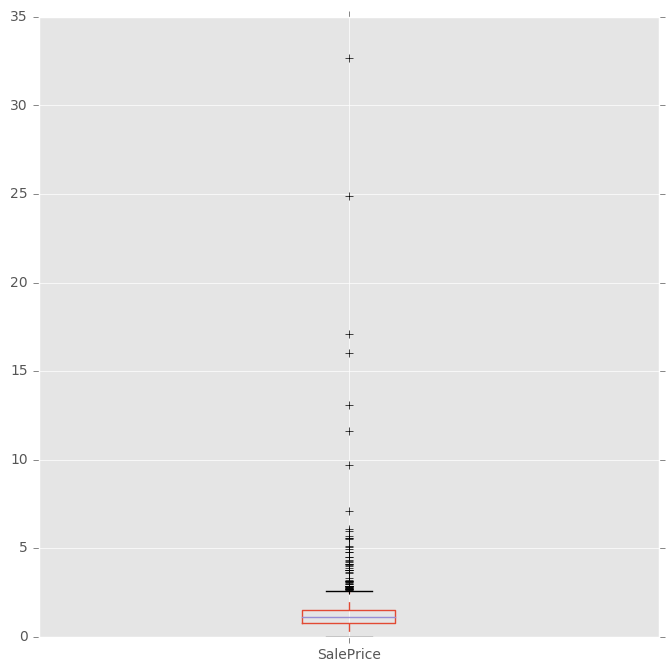

In [55]:
df.SalePrice.plot(kind = 'box', figsize = (8, 8))

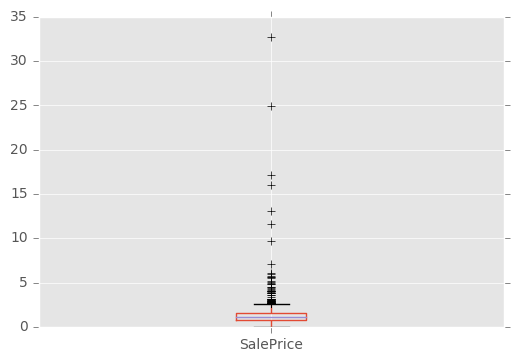

In [56]:
df[ ['SalePrice'] ].boxplot(figsize = (8, 8))

> In the same plot, plot the boxplots of `Beds` and `Baths`

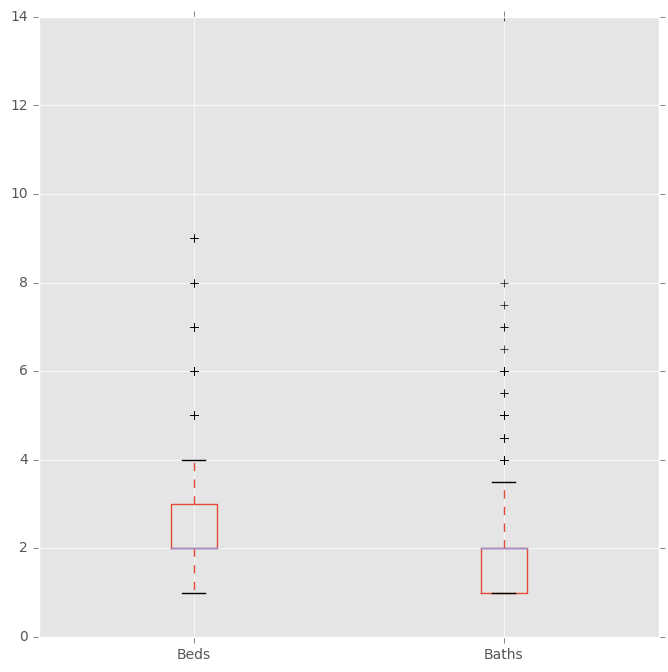

In [57]:
df[ ['Beds', 'Baths'] ].plot(kind = 'box', figsize = (8, 8))

(or)

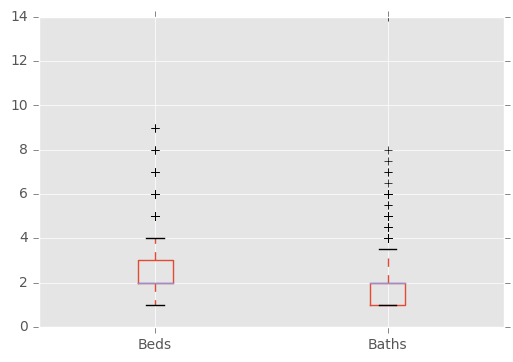

In [58]:
df[ ['Beds', 'Baths'] ].boxplot(figsize = (8, 8))

## Part E

- Histograms
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#histograms)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'hist'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.hist.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.hist.html)

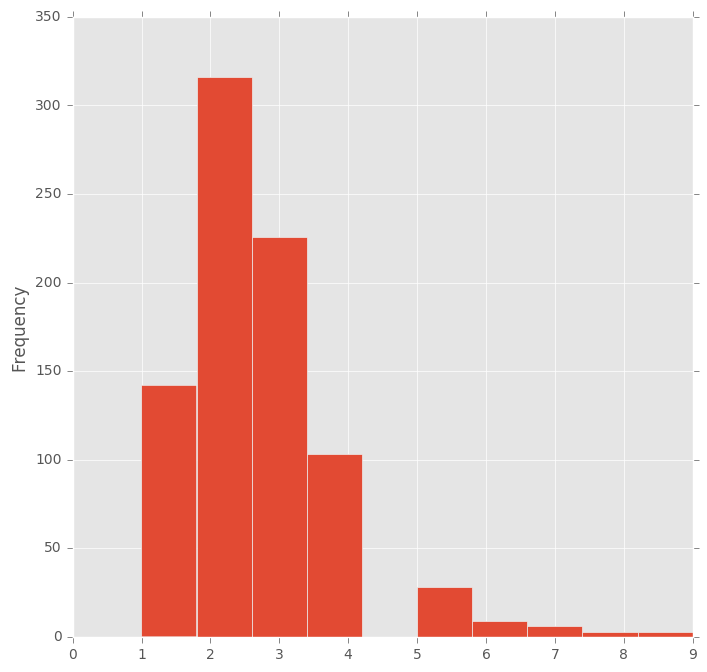

In [59]:
df.Beds.plot(kind = 'hist', figsize = (8, 8))

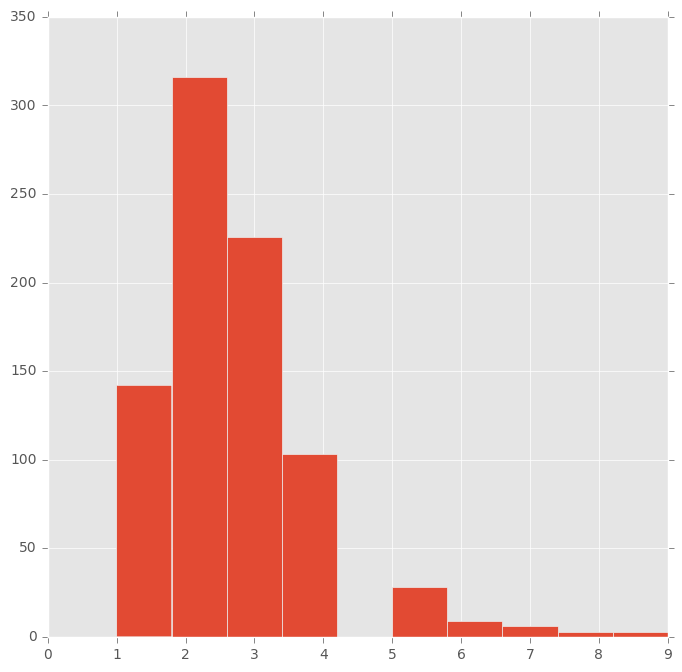

In [60]:
df.Beds.hist(figsize = (8, 8))

In [61]:
df.Beds.dropna().unique()

array([ 1.,  2.,  3.,  5.,  4.,  7.,  6.,  8.,  9.])

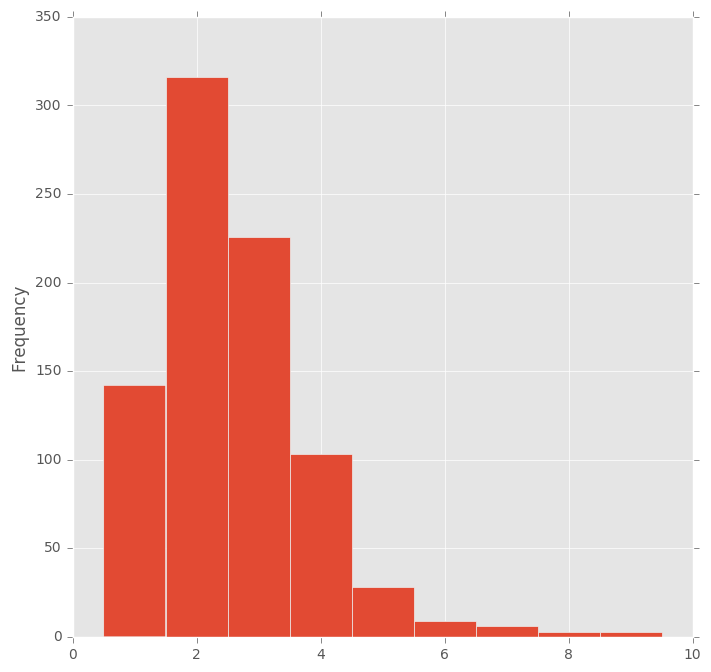

In [62]:
max = int(math.ceil(df.Beds.max()))

df.Beds.plot(kind = 'hist', range = (.5, max + .5), bins = max, figsize = (8, 8))

> #### Activity: In the same plot, plot the histograms of `Beds` and `Baths`

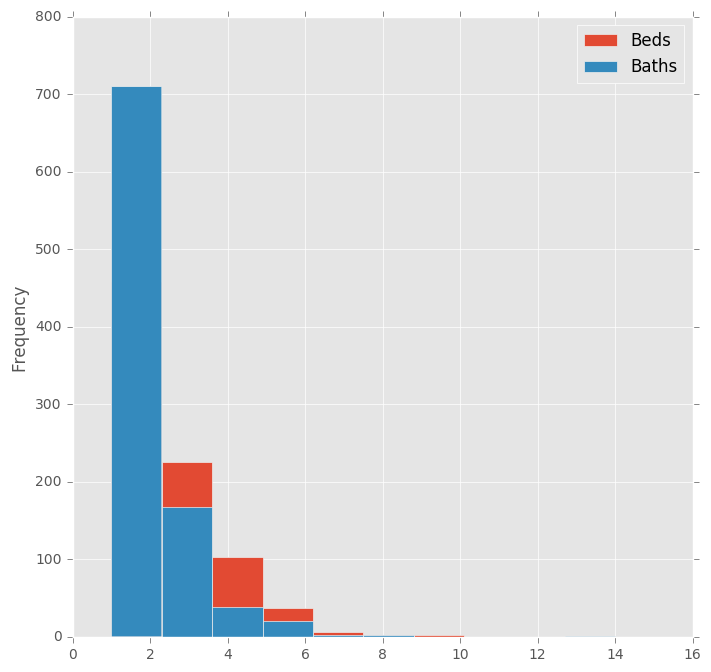

In [63]:
df[ ['Beds', 'Baths'] ].plot(kind = 'hist', figsize = (8, 8))

Here both histograms are in the same plot

(or)

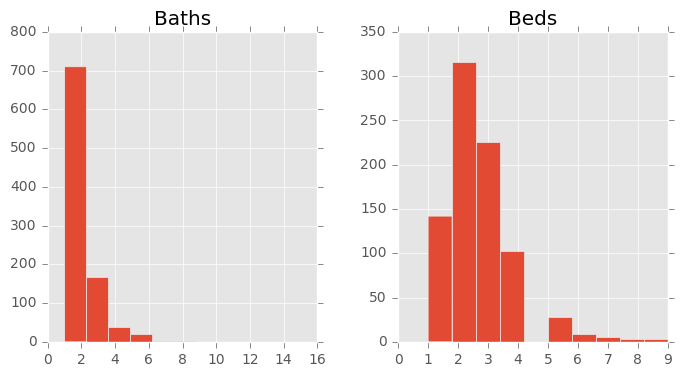

In [64]:
df[ ['Beds', 'Baths'] ].hist(figsize = (8, 4))

Here histograms are in the separate plots.

## Part F

- `.mode()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.mode.html)
  - ((http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.mode.html)

### `.mode()` - Compute the mode value(s)

In [65]:
df.mode()

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
0,"1 Mono St # B, San Francisco, CA",11/20/15,1.1,0.0,2.0,1.0,1000.0,2495.0,1900.0
1,"150 Grand View Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,"1915 Diamond St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"1954 Golden Gate Ave, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,"2299 Market St APT 502, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,"643 Natoma St, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,"829 Folsom St UNIT 906, San Francisco, CA",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
df.Address.mode()

0             1 Mono St # B, San Francisco, CA
1        150 Grand View Ave, San Francisco, CA
2           1915 Diamond St, San Francisco, CA
3      1954 Golden Gate Ave, San Francisco, CA
4    2299 Market St APT 502, San Francisco, CA
5             643 Natoma St, San Francisco, CA
6    829 Folsom St UNIT 906, San Francisco, CA
dtype: object

In [67]:
df.Baths.mode()

0    1.0
dtype: float64

The `.mode()` method gets the mode(s) of each element along the columns.  Empty if nothing has 2+ occurrences. Adds a row for each mode per label, fills in gaps with `NaN`.  Note that there could be multiple values returned in the columns (when more than one value share the maximum frequency), which is the reason why a dataframe is returned.

In [68]:
df[df.Address == '1 Mono St # B, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
59700333,"1 Mono St # B, San Francisco, CA",12/11/15,1.08,0.0,2.0,1.5,1142.0,NaN,1968.0
59779608,"1 Mono St # B, San Francisco, CA",12/11/15,1.08,0.0,NaN,NaN,1142.0,NaN,1968.0


In [69]:
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
123597964,"829 Folsom St UNIT 906, San Francisco, CA",12/7/15,0.675,0.0,NaN,NaN,557.0,NaN,2010.0
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",12/6/15,0.675,0.0,1.0,1.0,557.0,NaN,2010.0


In [70]:
df[df.Address == '1915 Diamond St, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
125156575,"1915 Diamond St, San Francisco, CA",12/30/15,1.8,0.0,NaN,1.0,2200.0,4316.0,1910.0
2100850402,"1915 Diamond St, San Francisco, CA",12/29/15,1.8,0.0,4.0,3.0,2400.0,4356.0,1910.0


In [71]:
df[df.Address == '1954 Golden Gate Ave, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15084954,"1954 Golden Gate Ave, San Francisco, CA",11/24/15,1.1,0.0,2.0,1.0,1515.0,NaN,1895.0
123597223,"1954 Golden Gate Ave, San Francisco, CA",11/24/15,1.1,0.0,2.0,1.0,1275.0,NaN,1895.0


In [72]:
df[df.Address == '2299 Market St APT 502, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
124891624,"2299 Market St APT 502, San Francisco, CA",12/4/15,0.915,0.0,1.0,1.0,691.0,NaN,2013.0
2100902229,"2299 Market St APT 502, San Francisco, CA",12/3/15,0.915,0.0,1.0,1.0,700.0,NaN,2013.0


In [73]:
df[df.Address == '643 Natoma St, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15147343,"643 Natoma St, San Francisco, CA",12/17/15,0.875,0.0,2.0,1.0,875.0,NaN,1910.0
123596761,"643 Natoma St, San Francisco, CA",12/17/15,0.875,0.0,2.0,1.0,830.0,NaN,1910.0


In [74]:
df[df.Address == '829 Folsom St UNIT 906, San Francisco, CA']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
123597964,"829 Folsom St UNIT 906, San Francisco, CA",12/7/15,0.675,0.0,NaN,NaN,557.0,NaN,2010.0
2121978635,"829 Folsom St UNIT 906, San Francisco, CA",12/6/15,0.675,0.0,1.0,1.0,557.0,NaN,2010.0


All duplicate entries...

In [75]:
df[df.DateOfSale == '11/20/15']

,Address,DateOfSale,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
ID,,,,,,,,,
15072263,"1795 Green St, San Francisco, CA",11/20/15,2.500,0.0,3.0,2.0,1647.0,NaN,1908.0
15073657,"1895 Pacific Ave APT 506, San Francisco, CA",11/20/15,0.975,0.0,1.0,1.0,1165.0,NaN,1931.0
15084143,"270 Ewing Ter, San Francisco, CA",11/20/15,1.570,0.0,2.0,1.0,1250.0,2178.0,1940.0
15093664,"591 29th Ave, San Francisco, CA",11/20/15,1.750,0.0,3.0,2.5,1800.0,1875.0,1936.0
15100149,"806 39th Ave, San Francisco, CA",11/20/15,1.050,0.0,NaN,1.0,1375.0,2374.0,1926.0
15104379,"1466 44th Ave, San Francisco, CA",11/20/15,0.892,0.0,2.0,1.0,1130.0,3049.0,1926.0
15104496,"1422 42nd Ave, San Francisco, CA",11/20/15,1.220,0.0,3.0,1.0,1325.0,2996.0,1951.0
15118458,"2279 47th Ave, San Francisco, CA",11/20/15,1.030,0.0,4.0,3.0,2570.0,2996.0,1900.0
15124103,"2514 40th Ave, San Francisco, CA",11/20/15,1.020,0.0,3.0,2.0,1490.0,3049.0,1945.0


In [76]:
df[df.DateOfSale == '11/20/15'].shape[0]

47

In [77]:
(df.DateOfSale == '11/20/15').sum()

47

## Part G

- `.corr()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.corr.html)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.corr.html)
- Heatmaps
  - (http://matplotlib.org/api/pyplot_api.html#matplotlib.pyplot.matshow)
- Scatter plots
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-plot)
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.plot.html) with `kind = 'scatter'`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.plot.scatter.html)
- Scatter matrices
  - (http://pandas.pydata.org/pandas-docs/stable/visualization.html#scatter-matrix-plot)

In [78]:
df.corr()

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.182713,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.006477,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.207291,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.196407,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.312854,-0.313989
LotSize,0.182713,-0.006477,0.207291,0.196407,0.312854,1.000000,0.022833
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.022833,1.000000


In [79]:
df.Beds.corr(df.Baths)

0.71519388432089781

### Heatmaps

In [80]:
corr = df.corr()

corr

,SalePrice,IsAStudio,Beds,Baths,Size,LotSize,BuiltInYear
SalePrice,1.000000,0.008889,0.379453,0.369938,0.485379,0.182713,-0.148598
IsAStudio,0.008889,1.000000,NaN,-0.078195,0.052166,-0.006477,-0.050258
Beds,0.379453,NaN,1.000000,0.715194,0.722656,0.207291,-0.344700
Baths,0.369938,-0.078195,0.715194,1.000000,0.692501,0.196407,-0.078157
Size,0.485379,0.052166,0.722656,0.692501,1.000000,0.312854,-0.313989
LotSize,0.182713,-0.006477,0.207291,0.196407,0.312854,1.000000,0.022833
BuiltInYear,-0.148598,-0.050258,-0.344700,-0.078157,-0.313989,0.022833,1.000000


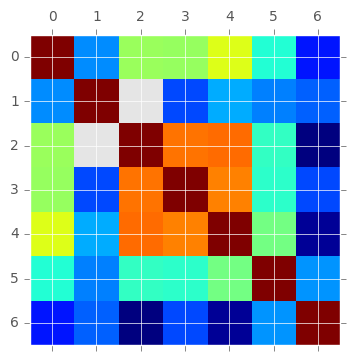

In [81]:
plt.matshow(corr)

Let's pretty this up.

In [82]:
list(corr.columns)

['SalePrice', 'IsAStudio', 'Beds', 'Baths', 'Size', 'LotSize', 'BuiltInYear']

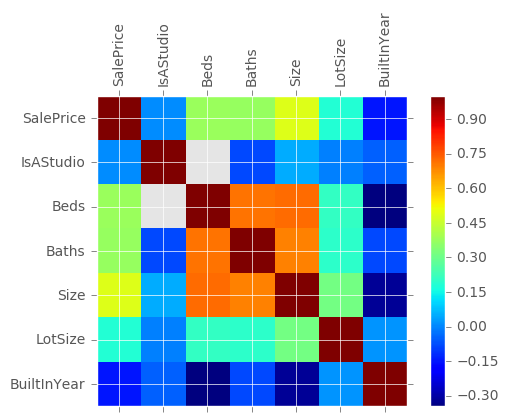

In [83]:
figure = plt.figure()
subplot = figure.add_subplot(1, 1, 1)
figure.colorbar(subplot.matshow(corr))
subplot.set_xticklabels([None] + list(corr.columns), rotation = 90)
subplot.set_yticklabels([None] + list(corr.columns))

### Scatter plots

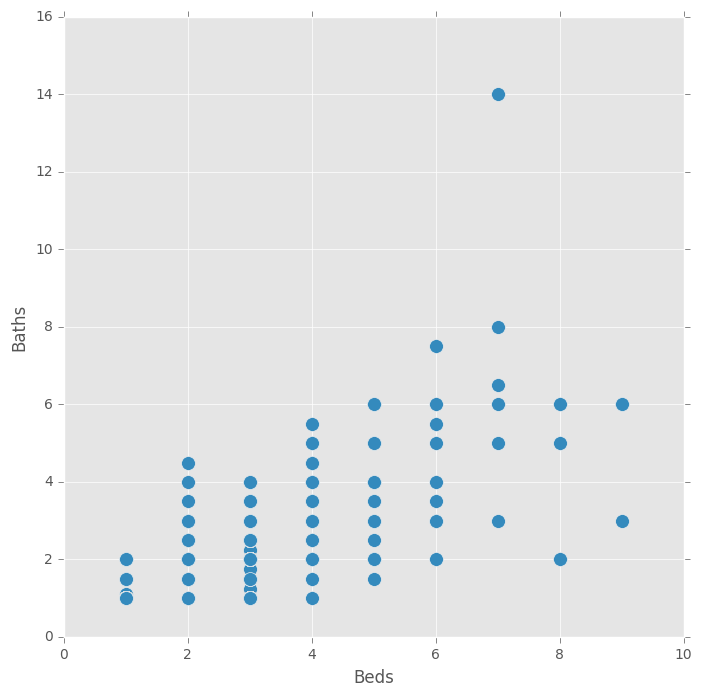

In [84]:
df.plot(kind = 'scatter', x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

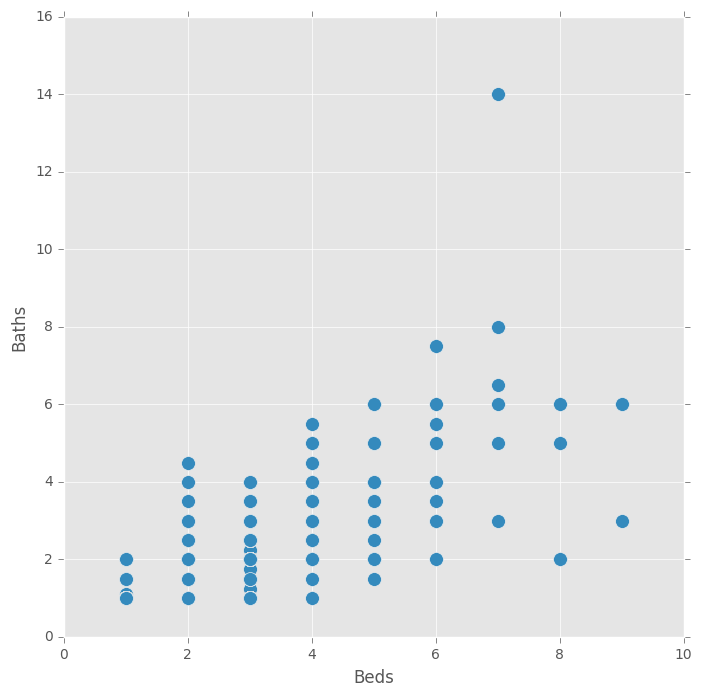

In [85]:
df.plot.scatter(x = 'Beds', y = 'Baths', s = 100, figsize = (8, 8))

### Scatter matrices

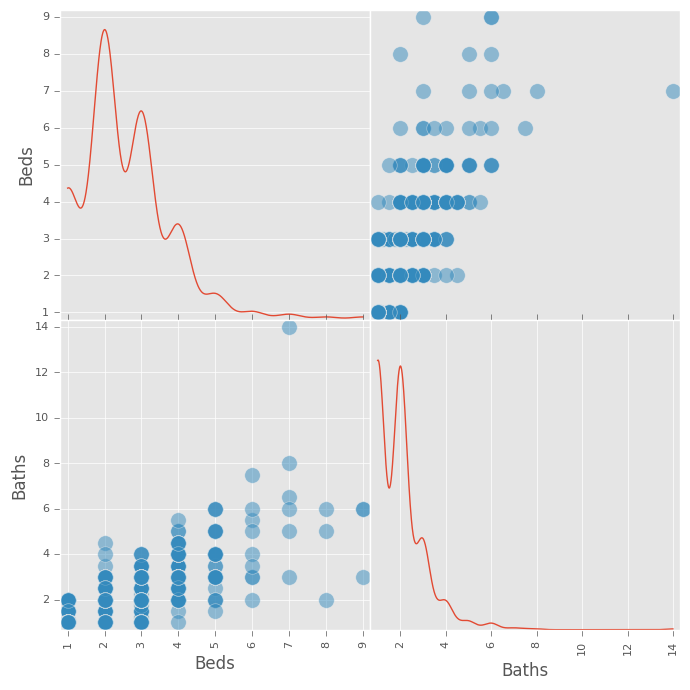

In [86]:
pd.tools.plotting.scatter_matrix(df[ ['Beds', 'Baths'] ], diagonal = 'kde', s = 500, figsize = (8, 8))

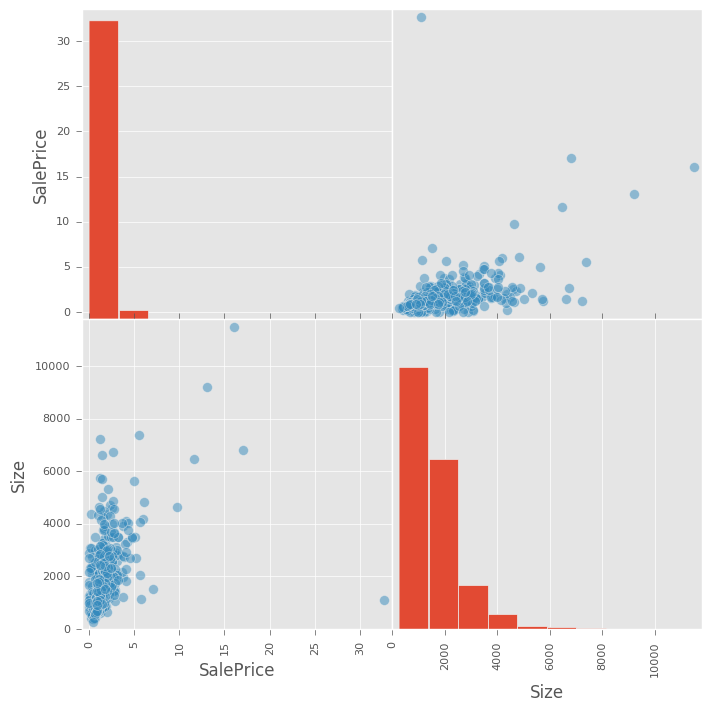

In [87]:
pd.tools.plotting.scatter_matrix(df[ ['SalePrice', 'Size'] ], s = 200, figsize = (8, 8))

## Part H

- `.value_counts()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.value_counts.html)
- `.crosstab()`
  - (http://pandas.pydata.org/pandas-docs/stable/generated/pandas.crosstab.html)

> #### Activity: Reproduce the `Beds` histogram above.  For each possible number of beds, how many properties share that bed count?

In [88]:
unique_beds = df.Beds.dropna().unique()

In [89]:
unique_beds

array([ 1.,  2.,  3.,  5.,  4.,  7.,  6.,  8.,  9.])

In [90]:
for beds in np.sort(unique_beds):
    properties = (df.Beds == beds).sum()
    print '{:3d} homes have {:1.0f} bedrooms'.format(properties, beds)

142 homes have 1 bedrooms
316 homes have 2 bedrooms
226 homes have 3 bedrooms
103 homes have 4 bedrooms
 28 homes have 5 bedrooms
  9 homes have 6 bedrooms
  6 homes have 7 bedrooms
  3 homes have 8 bedrooms
  3 homes have 9 bedrooms


Alternatively:

In [91]:
df.Beds.value_counts(dropna = False)

 2.0    316
 3.0    226
NaN     164
 1.0    142
 4.0    103
 5.0     28
 6.0      9
 7.0      6
 9.0      3
 8.0      3
Name: Beds, dtype: int64

> Careful on checking for `NaN` values!

In [92]:
df.Beds.isnull().sum()

164

In [93]:
(df.Beds == np.nan).sum()

0

> #### Activity: Create a frequency table for `Baths` over `Beds`

In [94]:
pd.crosstab(df.Baths, df.Beds, dropna = False)

Beds,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,9.0
Baths,,,,,,,,,
1.00,116,133,39,1,0,0,0,0,0
1.10,1,0,0,0,0,0,0,0,0
1.25,0,0,1,0,0,0,0,0,0
1.50,7,19,9,1,1,0,0,0,0
1.75,0,0,1,0,0,0,0,0,0
2.00,17,140,103,21,3,1,0,1,0
2.25,0,0,1,0,0,0,0,0,0
2.50,0,11,22,9,1,0,0,0,0
3.00,0,8,36,38,8,2,1,0,1


> #### Activity: Create a frequency table for `Beds` and `Baths` (together) over the centry the houses were built

In [95]:
pd.crosstab([df.Beds, df.Baths], df.BuiltInYear.apply(lambda year: np.floor(year / 100) * 100), dropna = False)

BuiltInYear  1800.0  1900.0  2000.0
Beds Baths                         
1.0  1.00         3      67      43
     1.10         0       0       1
     1.25         0       0       0
     1.50         0       3       4
     1.75         0       0       0
     2.00         1       4      12
     2.25         0       0       0
     2.50         0       0       0
     3.00         0       0       0
     3.50         0       0       0
...             ...     ...     ...
9.0  4.00         0       0       0
     4.50         0       0       0
     5.00         0       0       0
     5.50         0       0       0
     6.00         0       2       0
     6.50         0       0       0
     7.00         0       0       0
     7.50         0       0       0
     8.00         0       0       0
     14.00        0       0       0

[180 rows x 3 columns]